### Atividade da Aula

- **Aluno:** Augusto Mathias Adams

#### Parte 1

**Rode todo o código. Certifique-se de que você o compreendeu.**

Feito.

#### Parte 2
1. **Teste diferentes combinações de valores $z_1$ , $z_2$ , $z_3$ , $z_4$ e verifique as probabilidades resultantes $a_1$ , $a_2$ , $a_3$ , $a_4$ obtidas a partir da função Softmax.**

Feito. Resultados e metodologia estão na seção *Happy Hour* deste *notebook*. A função softmax implementada sempre computa a maior probabilidade para o elemento de entrada com maior valor.

2. **Modifique o código para que existam 5 classes ao invés de 4. Obtenha a acurácia correspondente.**

Feito. Resultados e metodologia estão na seção *Happy Hour* deste *notebook*. A acurácia obtida gira em torno de $97.6 \%$

# Classificação multi-classe com tensorflow


Nessa atividade de programação, exploraremos a função Softmax.
Essa função é usada tanto na Regressão Softmax como também em redes neurais para resolver problemas de classificação onde temos múltiplas classes.


  

In [172]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

> **OBS**: Normalmente, nos nossos notebooks, nós usamos a convenção de começar a contagem de índices em 0 e terminar em $N-1$, enquanto que nos slides da disciplina a contagem se inicia em 1 e termina em $N$. No presente notebook, usaremos a mesma notação que está nos slides para facilitar a compreensão.


## A função Softmax

Tanto na Regressão Softmax como nas redes neurais com saídas softmax, $N$ saídas são geradas e uma é selecionada como a categoria (classe) prevista. Em ambos os casos, um vetor $\mathbf{z}$, gerado por uma função linear é aplicado à função Softmax. A função softmax converte $\mathbf{z}$ em uma distribuição de probabilidade conforme descrito abaixo. Após aplicar softmax, cada saída estará entre 0 e 1 e as saídas somam 1, tal que essas saídas podem ser interpretadas como sendo probabilidades. Quanto maior forem as entradas, maiores são as probabilidades de saída.

A função Softmax pode ser escrita como sendo:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$

A saída $\mathbf{a}$ é um vetor de tamanho $N$, e pode ser interpretada da seguinte forma:
\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}


Isso mostra que as saídas são um vetor contendo probabilidades. A primeira saída (primeiro elemento do vetor) é a probabilidade de ser a primeira categoria dado o vetor de características de entrada $\mathbf{x}$ e parâmetros $\mathbf{w}$ e $\mathbf{b}$.  

Abaixo nós criamos nossa própria implementação NumPy da função Softmax:

In [173]:
def minha_softmax(z):
    ez = np.exp(z)              # exponencial elemento a elemento
    sm = ez/np.sum(ez)
    return(sm)

Supondo um problema com $N=4$ classes, use o código abaixo para testar e verificar as saídas da função softmax ($a_1$,$a_2$,$a_3$,$a_4$) para diferentes combinações de valores de entrada ($z_1$,$z_2$,$z_3$,$z_4$)

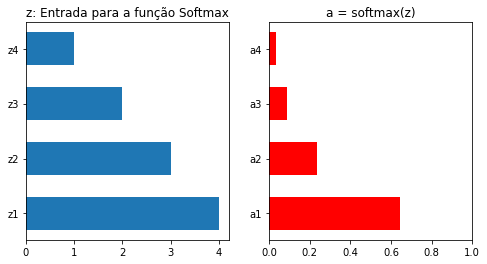

Soma das saídas softmax (a1+a2+a3+a4): 1.0


In [174]:
z4 = 1
z3 = 2
z2 = 3
z1 = 4

plt.close("all")

fig, ax = plt.subplots(1,2,figsize=(8,4))

z       = np.array([z1,z2,z3,z4])
z_nomes = np.array(['z1','z2','z3','z4'])
bar     = ax[0].barh(z_nomes, height=0.6, width=z, left=None, align='center')
ax[0].set_title("z: Entrada para a função Softmax")

a       = minha_softmax(z)
a_nomes = np.array(['a1','a2','a3','a4'])
sbar    = ax[1].barh(a_nomes, height=0.6, width=a, left=None, align='center',color='red')
ax[1].set_xlim([0,1])
ax[1].set_title("a = softmax(z)")

plt.show()

print(f'Soma das saídas softmax (a1+a2+a3+a4): {np.sum(a)}')

Conforme você varia os valores de z acima, algumas observações são importantes:
* os valores de saída (probabilidades) sempre somam 1
* a função softmax altera todas as saídas simultaneamente. Por exemplo, uma mudança em `z1` não altera apenas `a1`, mas também `a2`,`a3`,`a4`. Isso não ocorre quando usamos outras funções de ativação conhecidas, tais como ReLU ou sigmoide, que esbelecem relações do tipo uma-entrada-uma-saída.

## Função Custo

A função perda associada ao uso da função Softmax é a função de entropia cruzada para $N$ classes, isto é:

\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{se $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{se $y=N$}
  \end{cases} \tag{3}
\end{equation}

onde $y$ é a categoria alvo para esse exemplo e $\mathbf{a}$ é a saída da função Softmax. Mais especificamente, Os valores em $\mathbf{a}$ são as probabilidades que somam 1.


>**Lembre-se:** A Perda se refere apenas a uma amostra, enquanto que o *custo* leva em conta todas as amostras.


Note que na equação (3) acima, apenas a linha que corresponde ao alvo contribui para a perda, enquanto as demais linhas são ignoradas. Para escrever o custo nós precisamos de uma 'função indicadora' que será 1 quando o índice coincide com o alvo e zero caso contrário:

\begin{equation}
1\{y == n\} =\begin{cases}
    1, & \text{se $y==n$}.\\
    0, & \text{caso contrário}.
  \end{cases}
\end{equation}

  
Com essa definição, a função custo pode ser agora escrita conforme abaixo:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

onde $m$ é o número de amostras, $N$ é o número de saídas (classes). Note que a função custo nada mais é que a média das perdas.

## Tensorflow

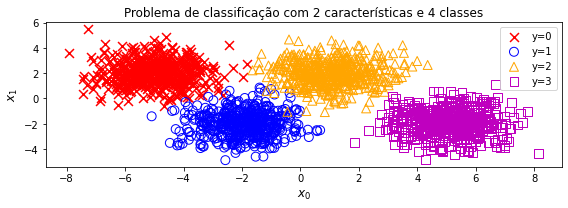

In [175]:
# Criando conjunto de dados e plotando
centros          = [[-5, 2], [-2, -2], [1, 2], [5, -2]] # Assim teremos 2 características e 4 classes (classes 0,1,2,3)
X_trein, y_trein = make_blobs(n_samples=2000, centers=centros, cluster_std=1.0,random_state=30)

classe0  = y_trein == 0
classe1  = y_trein == 1
classe2  = y_trein == 2
classe3  = y_trein == 3

fig,ax = plt.subplots(1,1,figsize=(8,3))
ax.scatter(X_trein[classe0,0], X_trein[classe0,1], marker='x', s=80, c = 'red', label="y=0")
ax.scatter(X_trein[classe1,0], X_trein[classe1,1], marker='o', s=80, label="y=1", facecolors='none', edgecolors='b',lw=1)
ax.scatter(X_trein[classe2,0], X_trein[classe2,1], marker='^', s=80, label="y=2", facecolors='none', edgecolors='orange',lw=1)
ax.scatter(X_trein[classe3,0], X_trein[classe3,1], marker='s', s=80, label="y=3", facecolors='none', edgecolors='m',lw=1)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_title('Problema de classificação com 2 características e 4 classes')
ax.legend()
plt.tight_layout()
plt.show()

### Implementação intuitiva

O modelo abaixo é implementado com a função softmax funcionando como uma ativação na camada Dense final.
A função perda é especificada separadamente por meio do comando `compile`.

A função perda é a função de entropia cruzada, denominada `SparseCategoricalCrossentropy`. Ela implementa a equação (3) acima.
A função perda recebe as saídas da função softmax (vetor de probabilidades para cada classe) e computa a perda associada.

In [176]:
modelo = Sequential(
    [
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < Note a função de ativação softmax aqui
    ]
)
modelo.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

modelo.fit(
    X_trein,y_trein,
    epochs=10
)


Epoch 1/10
63/63 [==============================] - 0s 859us/step - loss: 0.7011
Epoch 2/10
63/63 [==============================] - 0s 865us/step - loss: 0.2867
Epoch 3/10
63/63 [==============================] - 0s 696us/step - loss: 0.1211
Epoch 4/10
63/63 [==============================] - 0s 730us/step - loss: 0.0781
Epoch 5/10
63/63 [==============================] - 0s 842us/step - loss: 0.0614
Epoch 6/10
63/63 [==============================] - 0s 810us/step - loss: 0.0522
Epoch 7/10
63/63 [==============================] - 0s 789us/step - loss: 0.0468
Epoch 8/10
63/63 [==============================] - 0s 756us/step - loss: 0.0429
Epoch 9/10
63/63 [==============================] - 0s 722us/step - loss: 0.0396
Epoch 10/10
63/63 [==============================] - 0s 689us/step - loss: 0.0367


Uma vez que a função softmax encontra-se integrada à camada de saída, sua saída já é o vetor de probabilidades (números entre 0 e 1), conforme mostrado abaixo. Note que temos quatro probabilidades para cada exemplo de treinamento em X_train. Esses quatro valores denotam a probabilidade da respectiva amostra pertencer a cada uma das quatro classes ($y=0,1,2,3$)

In [177]:
i = 3
probabilidades = modelo.predict(X_trein[i,:].reshape(1,-1)) # calcula a saída da rede neural para o exemplo de treinamento i
print(probabilidades)

1/1 [==============================] - 0s 35ms/step
[[0.00287356 0.98962885 0.00368252 0.00381495]]


Note que as saídas do nosso modelo são de fato valores entre 0 e 1 (probabilidades). Para retornar um valor inteiro representando a classe prevista, basta você verificar o índice (posição) com a maior probabilidade. Isso pode ser obtido com a função Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [178]:
yhat = np.argmax(probabilidades)

print(f"np.argmax(probabilidades) = classe estimada: {yhat}")
print(f"classe verdadeira: {y_trein[i]}")

np.argmax(probabilidades) = classe estimada: 1
classe verdadeira: 1


Seguindo as ideias acima, abaixo nós calculamos a taxa de acerto levando em conta todas as amostras do nosso conjunto de dados.

In [179]:
Probabilidades = modelo.predict(X_trein) # calcula a saída da rede neural para o exemplo de treinamento i

print("maior probabilidade:", np.max(Probabilidades), "     menor probabilidade:", np.min(Probabilidades))

Yhat        = np.argmax(Probabilidades,axis=1)
taxa_acerto = np.mean((Yhat==y_trein)*100)
print(f"taxa de acerto (acurácia): {taxa_acerto} %")

63/63 [==============================] - 0s 679us/step
maior probabilidade: 0.99999976      menor probabilidade: 7.579135e-13
taxa de acerto (acurácia): 98.85 %


## Quando usar 'SparseCategorialCrossentropy' e quando usar 'CategoricalCrossEntropy'?

O Tensorflow permite que você entre com dois possíveis tipos de formatação para os valores alvo e a seleção da função de perda define qual formatação está sendo esperada.
- SparseCategorialCrossentropy: Espera que o valor alvo para uma amostra seja um valor inteiro correspondente ao índice. Exemplo: temos 10 possíveis categorias, sendo $y = $ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9.
- CategoricalCrossEntropy: Espera que o valor alvo para uma amostra esteja codificado na forma `one-hot bit`, onde o índice alvo é 1 enquanto os demais valores são nulos. Por exemplo, quando há 10 categorias e y para a terceira categoria é $[0,0,1,0,0,0,0,0,0,0]$

## Parabéns!

Com essa atividade, você
- Tornou-se mais familiar com a função softmax e seu uso como função de ativação na última camada de redes neurais.
- Aprendeu a implementação mais robusta numericamente em Tensorflow:
    - Usar ativação linear na última camada
    - Usar SparseCategoricalCrossentropy como função perda


## Happy Hour

### Teste diferentes combinações de valores $z_1$ , $z_2$ , $z_3$ , $z_4$ e verifique as probabilidades resultantes $a_1$ , $a_2$ , $a_3$ , $a_4$ obtidas a partir da função Softmax.

[[-3.27196773 -2.19889992  3.56838549  2.11505605]
 [-1.30668539 -2.00623287  1.17970504 -3.75918977]
 [ 2.07307253  5.30163438 -3.02105142  5.38657382]
 [ 2.00684944 -4.84922477 -0.69792401  4.63775903]
 [ 2.369442   -2.08232563  2.80713796 -3.35838053]
 [-5.02086517 -4.08125279 -1.91879778 -0.41768216]
 [-2.80294766  3.78931684 -3.68046733 -4.44637109]
 [-4.90002298  1.18281616  4.25690285  1.2194549 ]
 [ 5.18386033  2.69737633  4.32661581  5.15205362]
 [ 0.55423211  5.25207551 -0.06014472 -2.71472181]
 [-0.57865551  1.98046708 -2.02930883  4.84144808]
 [-2.9151099  -1.92205995 -2.89375922 -1.73464224]
 [-5.939732    1.54325453 -2.61140751 -5.18294773]
 [ 1.40194773 -3.88408416 -2.34733935 -0.70935827]
 [-4.19757191 -3.38485364 -0.30800262 -0.28357374]
 [-2.93721175 -2.42921678 -2.65119456 -2.87304945]]
Soma das saídas softmax (linha 1): 1.00
Soma das saídas softmax (linha 2): 1.00
Soma das saídas softmax (linha 3): 1.00
Soma das saídas softmax (linha 4): 1.00
Soma das saídas softmax

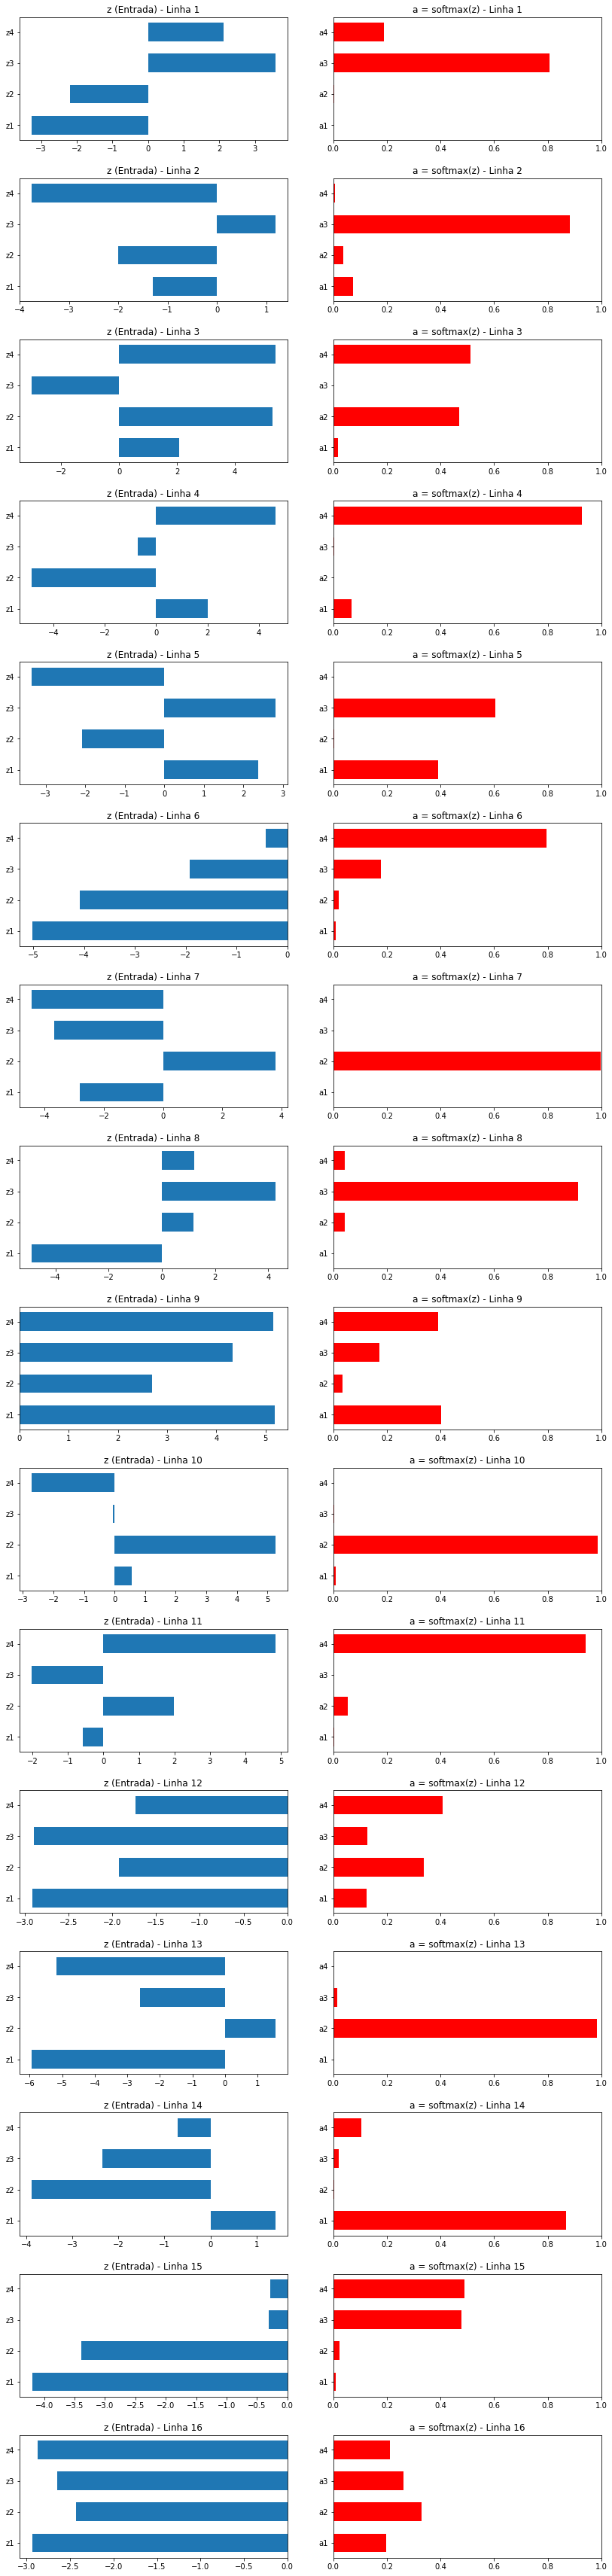

In [180]:
# instanciando um gerador randômico para gerar os valores de teste
rng = np.random.default_rng(12345) 


# gerando os valores de teste

z = 12 * rng.random((16, 4)) - 6

print(z)

plt.close("all")

fig, axs = plt.subplots(16, 2, figsize=(12, 48))  
fig.tight_layout(pad=3.0) 

for i in range(16):
    z_nomes = np.array(['z1', 'z2', 'z3', 'z4'])
    bar = axs[i, 0].barh(z_nomes, height=0.6, width=z[i], align='center')
    axs[i, 0].set_title(f"z (Entrada) - Linha {i + 1}")
    
    # Calculando softmax
    a = minha_softmax(z[i])  # Softmax aplicado à linha i (mantém dimensão)
    a = a.flatten()  # Para ajustar ao formato de gráfico
    
    a_nomes = np.array(['a1', 'a2', 'a3', 'a4'])
    sbar = axs[i, 1].barh(a_nomes, height=0.6, width=a, align='center', color='red')
    axs[i, 1].set_xlim([0, 1])
    axs[i, 1].set_title(f"a = softmax(z) - Linha {i + 1}")
    
    print(f"Soma das saídas softmax (linha {i + 1}): {np.sum(a):.2f}")

plt.show()


### **Teste diferentes combinações de valores $z_1$ , $z_2$ , $z_3$ , $z_4$ e verifique as probabilidades resultantes $a_1$ , $a_2$ , $a_3$ , $a_4$ obtidas a partir da função Softmax.**

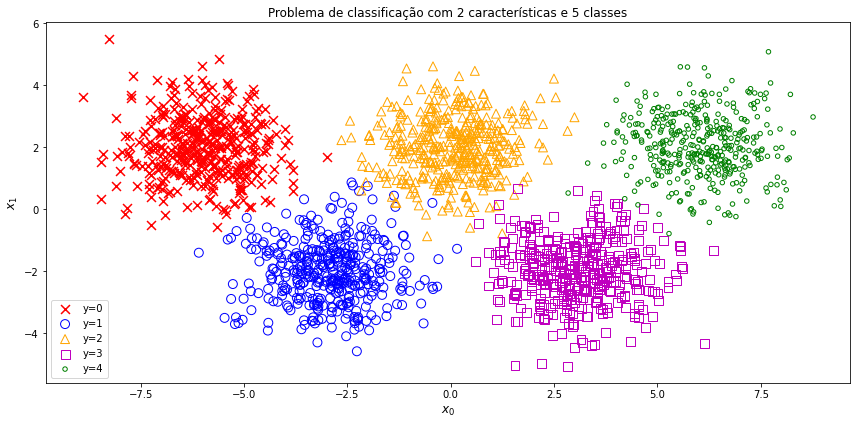

In [181]:
# Criando conjunto de dados e plotando
centros          = [[-6, 2], [-3, -2], [0, 2], [3, -2], [6, 2]] # Assim teremos 2 características e 5 classes (classes 0,1,2,3,4)
X_trein, y_trein = make_blobs(n_samples=2000, centers=centros, cluster_std=1.0,random_state=30)

classe0  = y_trein == 0
classe1  = y_trein == 1
classe2  = y_trein == 2
classe3  = y_trein == 3
classe4  = y_trein == 4

fig,ax = plt.subplots(1,1,figsize=(12, 6))
ax.scatter(X_trein[classe0,0], X_trein[classe0,1], marker='x', s=80, c = 'red', label="y=0")
ax.scatter(X_trein[classe1,0], X_trein[classe1,1], marker='o', s=80, label="y=1", facecolors='none', edgecolors='b',lw=1)
ax.scatter(X_trein[classe2,0], X_trein[classe2,1], marker='^', s=80, label="y=2", facecolors='none', edgecolors='orange',lw=1)
ax.scatter(X_trein[classe3,0], X_trein[classe3,1], marker='s', s=80, label="y=3", facecolors='none', edgecolors='m',lw=1)
ax.scatter(X_trein[classe4,0], X_trein[classe4,1], marker='.', s=80, label="y=4", facecolors='none', edgecolors='g',lw=1)
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
ax.set_title('Problema de classificação com 2 características e 5 classes')
ax.legend()
plt.tight_layout()
plt.show()

#### Treino da rede neural

In [182]:
tf.random.set_seed(12345)

modelo = Sequential(
    [
        Dense(25, activation = 'relu',
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)), ## garantindo reproducibilidade
        Dense(15, activation = 'relu',
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)), ## garantindo reproducibilidade
        Dense(5, activation = 'softmax', 
              kernel_initializer=tf.keras.initializers.GlorotUniform(seed=42)) ## garantindo reproducibilidade
    ]
)

modelo.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

modelo.fit(
    X_trein,y_trein,
    epochs=10
)

Probabilidades = modelo.predict(X_trein) # calcula a saída da rede neural para o exemplo de treinamento i

print("maior probabilidade:", np.max(Probabilidades), "     menor probabilidade:", np.min(Probabilidades))

Yhat        = np.argmax(Probabilidades,axis=1)
taxa_acerto = np.mean((Yhat==y_trein)*100)
print(f"taxa de acerto (acurácia): {taxa_acerto:.1f} %")

Epoch 1/10
63/63 [==============================] - 0s 984us/step - loss: 1.2717
Epoch 2/10
63/63 [==============================] - 0s 869us/step - loss: 0.7482
Epoch 3/10
63/63 [==============================] - 0s 851us/step - loss: 0.4695
Epoch 4/10
63/63 [==============================] - 0s 855us/step - loss: 0.2814
Epoch 5/10
63/63 [==============================] - 0s 784us/step - loss: 0.1766
Epoch 6/10
63/63 [==============================] - 0s 832us/step - loss: 0.1309
Epoch 7/10
63/63 [==============================] - 0s 790us/step - loss: 0.1082
Epoch 8/10
63/63 [==============================] - 0s 802us/step - loss: 0.0940
Epoch 9/10
63/63 [==============================] - 0s 776us/step - loss: 0.0853
Epoch 10/10
63/63 [==============================] - 0s 738us/step
maior probabilidade: 0.9999883      menor probabilidade: 3.201321e-15
taxa de acerto (acurácia): 97.6 %


###